# U.S. Medical Insurance Costs

### Scope and Understand the Data

In [1]:
import pandas as pd
data = pd.read_csv('insurance.csv')

# modify any columns for readability:

# renamed columns
data.columns = ['Age', 'Sex', 'BMI', 'Num Children', 'Smoker', 'Region', 'Charges (USD $)']

# rounded the values in the Charges column to match generic USD $ format
data['Charges (USD $)'] = data['Charges (USD $)'].round(2)

# used .title() to captalize the first letter for each region name
data['Region'] = data['Region'].apply(lambda x: x.title())

# display the first 5 rows of the dataset
data.head()

,Age,Sex,BMI,Num Children,Smoker,Region,Charges (USD $)
0,19,female,27.900,0,yes,Southwest,16884.92
1,18,male,33.770,1,no,Southeast,1725.55
2,28,male,33.000,3,no,Southeast,4449.46
3,33,male,22.705,0,no,Northwest,21984.47
4,32,male,28.880,0,no,Northwest,3866.86


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.swarmplot(data=data, x='BMI', y='Charges (USD $)', hue='Smoker')
plt.show()

### Parts of the Data:
The data contains the following information about the patients:
* Age
* Sex
* BMI
* Number of Children
* Smoker/Non-Smoker
* Region
* Insurance Charges based off the above information

## Project Goals
After reviewing the data, here are some things I would like to analyze and find if there are any relationships:
* **Task 1:** What is the average age of the patients in the dataset?
* **Task 2:** Where are the majority of the patients from?
* **Task 3:** What is the average age of someone with at least one child?
* **Task 4:** Does a person's BMI have a major effect on their insurance costs?
* **Task 5:** Does the region where the person is located affect insurance costs?
* **Task 6:** Would a **smoker with no children** have similar insurance charges as a **non-smoker with children**?

#### Task 1: Finding the average age of the patients in the dataset

In [21]:
# grab the age column in the data 
# use pandas feature .mean() to find the average age across that column
age = insurance['Age']
average_age = age.mean()
# std_age = age.std()
print(f"The average age of the patients in the dataset is {int(average_age)}.")

import matplotlib.pyplot as plt
import seaborn as sns

# sns.displot(data=insurance, x='Age',kind = 'hist')
# plt.title("Number of Patients in Each Age Range (18-64 Years Old)")
# plt.ylabel("Patients")
# plt.show()


The average age of the patients in the dataset is 39.


After finding the average age of all the patients, I now want to look at the average age of the women and the men

The average age of females in the dataset is 39 and the average age of the males is 38


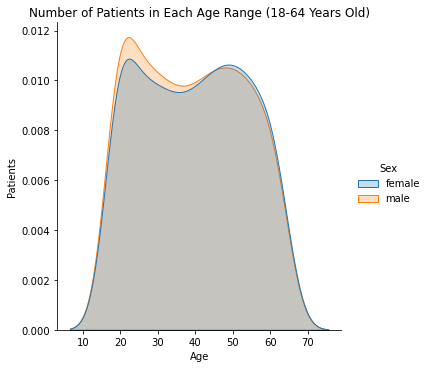

In [24]:
# use pandas .groupby() to group average age by "male" and "female"
sex_average_age = insurance.groupby('Sex').Age.mean().reset_index()

print(f"The average age of females in the dataset is {int(sex_average_age.Age[0])} and the average age of the males is {int(sex_average_age.Age[1])}")

import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data=insurance, x='Age',hue= 'Sex', kind = 'kde',fill=True)
plt.title("Number of Patients in Each Age Range (18-64 Years Old)")
plt.ylabel("Patients")
plt.show()

**Task 1 Results**:

The average age of **all** the patients is **39 years old**

The average age of:
* Females: **39 years old**
* Males: **38 years old**

#### Task 2: Find where the majority of the patients are from 

In [82]:
# view the region column
region = insurance.groupby(['Region']).Age.count().reset_index()
region

,Region,Age
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


The dataframe shows that the majority of the patients are from the Southeast with a total of **364** patients

#### Task 2.1
I now want to take a look and see which region has the most smokers. 

**Hypothesis: The region with the most smokers will have the higher charges of insurance costs**

In [61]:
smokers = insurance.groupby(['Smoker (Yes/No)','Region']).count().reset_index()
# smokers

# make it more readable by converting it into a pivot table -> take smoker and region column
smokers_pivoted = smokers.pivot(
    columns = 'Smoker (Yes/No)',
    index = 'Region',
    values='Age').reset_index()

smokers_pivoted

Smoker (Yes/No),Region,no,yes
0,northeast,257,67
1,northwest,267,58
2,southeast,273,91
3,southwest,267,58


According to the dataframe, the **southeast** consists of the most smokers (91 patients) and non-smokers (273 patients)

*Now*, let's calculate the average cost of insurance for smokers in each region

In [83]:
cost_of_insurance = insurance.groupby(['Region', 'Smoker (Yes/No)'])['Charges (USD $)'].mean().round(2).reset_index()
cost_of_insurance

,Region,Smoker (Yes/No),Charges (USD $)
0,northeast,no,9165.53
1,northeast,yes,29673.54
2,northwest,no,8556.46
3,northwest,yes,30192.00
4,southeast,no,8032.22
5,southeast,yes,34845.00
6,southwest,no,8019.28
7,southwest,yes,32269.06


In [81]:
# pivot table for readability
cost_of_insurance_pivoted = cost_of_insurance.pivot(
columns = 'Smoker (Yes/No)',
index = 'Region',
values = 'Charges (USD $)')

cost_of_insurance_pivoted

Smoker (Yes/No),no,yes
Region,,
northeast,9165.53,29673.54
northwest,8556.46,30192.00
southeast,8032.22,34845.00
southwest,8019.28,32269.06


**Task 2 Results:**

* The southeast indeed has the highest cost of insurance at **$34,845.00**

*Other ideas to look at:*

I noticed that the **northeast** has the highest insurance cost for **non-smokers** at **$9,165.53** and that makes me wonder why. I will look further into this after completing the set tasks I have currently.

#### Task 3: What is the average age of someone with at least one child?

To approach this task, I will need to:
* group the data by number of children 
* find the average age

In [88]:
num_children = insurance.groupby('# of Children').Age.mean().round(0).reset_index()
num_children

,# of Children,Age
0,0,38.0
1,1,39.0
2,2,39.0
3,3,42.0
4,4,39.0
5,5,36.0


According to the table above, the average age of someone with at least one child is **39 years old**

#### Task 4: Does BMI cause an effect on insurance costs?

To tackle this task, I will need to:
* find the min and max BMI value 
* find the average insurance cost between:
    * min BMI to middle
    * middle to max BMI

In [6]:
# bmi_min = insurance['BMI'].min()
# print(f"The minimum BMI in the dataset is {bmi_min}")
# bmi_max = insurance['BMI'].max()
# print(f"The maximum BMI in the dataset is {bmi_max}")
bmi_median = insurance['BMI'].median()
print(f"The median BMI in the dataset is {bmi_median}")

The median BMI in the dataset is 30.4


At this point, since I know the median value for the BMI data, I need to find the average insurance charges that's below the median and the average insurance cost above the median

In [8]:
bmi_charges = insurance[['BMI', 'Charges (USD $)']]
insurance_min = bmi_charges[bmi_charges['BMI'] < bmi_charges['BMI'].median()]
insurance_max = bmi_charges[bmi_charges['BMI'] >= bmi_charges['BMI'].median()]
print(f"The average insurance cost for patients whose BMI is below {bmi_median} is ${insurance_min['Charges (USD $)'].mean().round(2)}.")
print(f"The average insurance cost for patients whose BMI is above {bmi_median} is ${insurance_max['Charges (USD $)'].mean().round(2)}.")
print(f"The difference between the two is ${round(insurance_max['Charges (USD $)'].mean() - insurance_min['Charges (USD $)'].mean(),2)}")


The average insurance cost for patients whose BMI is below 30.4 is $10877.96.
The average insurance cost for patients whose BMI is above 30.4 is $15655.74.
The difference between the two is $4777.78


#### Task 4 Result:

There seems to be roughly a $5000 difference between patients whose BMI is below the median. 

**Next Task:**

To analyze further, I compare costs between the women and men and also by age to see if there are any major differences. 


#### Task 5: Does the region where the person is located affect insurance costs?

In [25]:
region = insurance.groupby('Region')['Charges (USD $)'].mean().reset_index()
region

,Region,Charges (USD $)
0,northeast,13406.384599
1,northwest,12417.575169
2,southeast,14735.411484
3,southwest,12346.937508


#### Using a Categorical Scatter Plot to show the relationship between BMI and Insurance Costs between Smokers & Non-Smokers

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
insurance.head()

,Age,Sex,BMI,# of Children,Smoker (Yes/No),Region,Charges (USD $)
0,19,female,27.900,0,yes,southwest,16884.92
1,18,male,33.770,1,no,southeast,1725.55
2,28,male,33.000,3,no,southeast,4449.46
3,33,male,22.705,0,no,northwest,21984.47
4,32,male,28.880,0,no,northwest,3866.86


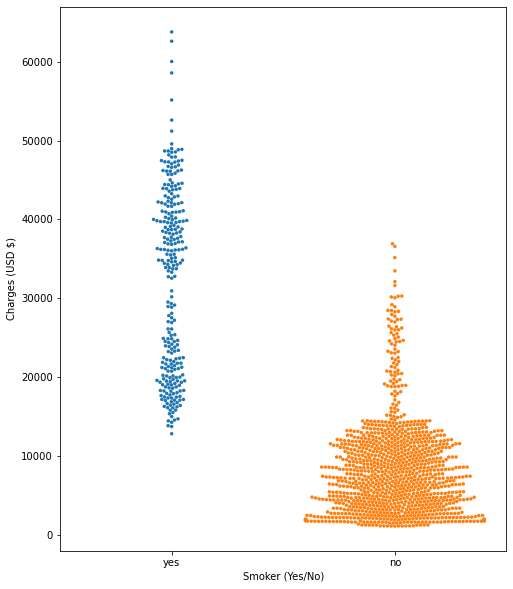

In [15]:

plt.figure(figsize=(8,10))
sns.swarmplot(x=insurance['Smoker (Yes/No)'], y=insurance['Charges (USD $)'], s=3.5)
plt.show()